Run blastn genewise

In [1]:
import os
os.chdir('../../' )
cwd=os.getcwd()

from oligo_designer_toolsuite.oligo_specificity_filter._filter_base import ProbeFilterBase
from oligo_designer_toolsuite.oligo_specificity_filter._filter_exact import ProbeFilterExact
from oligo_designer_toolsuite.oligo_specificity_filter._filter_blastn import ProbeFilterBlastn

In [2]:
cwd

'/home/chels/CRISPR/repos/oligo-designer-toolsuite'

In [2]:
from oligo_designer_toolsuite.IO._data_parser import read_gtf

gtf= cwd + "/output/annotations/GCF_000001405.40_GRCh38.p14_genomic.gtf"

df=read_gtf(gtf)

In [3]:
genes=df["gene_id"].tolist()[:100]
ligation_region=0
dir_output=cwd + "/output/"
dir_annotations=dir_output+"annotations/"
file_probe_info=dir_annotations + "oligo_DB_unknown_unknown_Custom_release_unknown_gene_transcript"
min_probes_per_gene=2
file_transcriptome_fasta=dir_output +"annotations/reference_DB_unknown_unknown_Custom_release_unknown_genome_False_gene_transcript_True"
word_size=10
percent_identity=80
probe_length_min=30
probe_length_max=40
coverage=60

Run for no. batches=no. genes

In [6]:

number_batches=len(genes)
filter_exact=ProbeFilterExact(number_batches, ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene,
        dir_annotations)

blast_filter=ProbeFilterBlastn(number_batches,
        file_transcriptome_fasta, 
        ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene, word_size, percent_identity, probe_length_min, probe_length_max, coverage)

filter_exact.apply()
blast_filter.apply()

INFO:filter_probes:Creating batches
INFO:filter_probes:Exact matches filtered in 0.5288085000001956 seconds
INFO:filter_probes:Creating blast database
INFO:filter_probes:Blast database created in 27.879516999999396 seconds
INFO:filter_probes:Blast alignmnet search finished in 9.00010360000033 seconds
INFO:filter_probes:Blast results processed in 0.9777730000005249 seconds


Run filter for 8 batches (number cpus)

In [5]:
number_batches=8

filter_exact=ProbeFilterExact(number_batches, ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene,
        dir_annotations)

blast_filter=ProbeFilterBlastn(number_batches,
        file_transcriptome_fasta, 
        ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene, word_size, percent_identity, probe_length_min, probe_length_max, coverage)


filter_exact.apply()
blast_filter.apply()

INFO:filter_probes:Creating batches
INFO:filter_probes:Exact matches filtered in 0.41575880000073084 seconds
INFO:filter_probes:Creating blast database
INFO:filter_probes:Blast database created in 39.262963899999704 seconds
INFO:filter_probes:Blast alignmnet search finished in 10.247859300000528 seconds
INFO:filter_probes:Blast results processed in 0.7422986000001401 seconds


Run filter for 5 batches (2 genes per batch)

In [9]:
number_batches=5

        
filter_exact=ProbeFilterExact(number_batches, ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene,
        dir_annotations)

blast_filter=ProbeFilterBlastn(number_batches,
        file_transcriptome_fasta, 
        ligation_region,
        dir_output,
        file_probe_info,
        genes, min_probes_per_gene,
        word_size, percent_identity, probe_length_min, probe_length_max, coverage)

In [10]:
filter_exact.apply()

INFO:filter_probes:Creating batches
INFO:filter_probes:Exact matches filtered in 0.04456019999997807 seconds


In [11]:
blast_filter.apply()

INFO:filter_probes:Creating blast database
INFO:filter_probes:Blast database created in 29.68888589999915 seconds
INFO:filter_probes:Blast alignmnet search finished in 1.0400885000017297 seconds
INFO:filter_probes:Blast results processed in 0.1416412999969907 seconds


Run filter for 1 batch

In [15]:
number_batches=1

filter_exact=ProbeFilterExact(number_batches, ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene,
        dir_annotations)

blast_filter=ProbeFilterBlastn(number_batches,
        file_transcriptome_fasta, 
        ligation_region,
        dir_output,
        file_probe_info,
        genes, min_probes_per_gene,
        word_size, percent_identity, probe_length_min, probe_length_max, coverage)

In [16]:
filter_exact.apply()

INFO:filter_probes:Creating batches
INFO:filter_probes:Exact matches filtered in 0.019585199999710312 seconds


In [17]:
blast_filter.apply()

INFO:filter_probes:Creating blast database
INFO:filter_probes:Blast database created in 26.746704400000453 seconds
INFO:filter_probes:Blast alignmnet search finished in 1.1757191000033345 seconds
INFO:filter_probes:Blast results processed in 0.11555640000005951 seconds


Run filter for 2 batches (5 genes per batch)

In [12]:
number_batches=2

filter_exact=ProbeFilterExact(number_batches, ligation_region,
        dir_output,
        file_probe_info,
        genes,
        min_probes_per_gene,
        dir_annotations)

blast_filter=ProbeFilterBlastn(number_batches,
        file_transcriptome_fasta, 
        ligation_region,
        dir_output,
        file_probe_info,
        genes, min_probes_per_gene,
        word_size, percent_identity, probe_length_min, probe_length_max, coverage)

In [13]:
filter_exact.apply()

INFO:filter_probes:Creating batches
INFO:filter_probes:Exact matches filtered in 0.014794200000324054 seconds


In [14]:
blast_filter.apply()

INFO:filter_probes:Creating blast database
INFO:filter_probes:Blast database created in 28.575938599999063 seconds
INFO:filter_probes:Blast alignmnet search finished in 0.9676265000016429 seconds
INFO:filter_probes:Blast results processed in 0.15396490000057383 seconds


Check correlation between no. input probes and file size

In [7]:

batches=[10]
number_subbatches=1
no_probes_per_batch=[]
blast_file_size_per_batch=[]
for i in batches:
    filter_exact.apply(number_batches=i)

    #check no probes per batch 
    for batch_id in range(i):
        for subbatch_id in range(number_subbatches):
            file_probe_fasta_batch = os.path.join(
                dir_annotations,
                "probes_sequence_batch{}_{}.fna".format(batch_id, subbatch_id),
            )
            with open(file_probe_fasta_batch, "r") as handle:
                sequences_batch = [line.rstrip() for line in handle]
            probes_in_batch=len(sequences_batch)
            no_probes_per_batch.append(probes_in_batch)

    #run blast
    blast_filter.run_blast_search(i)

    for batch_id in range(i):
        for subbatch_id in range(number_subbatches):
            #get size of blast results file
            dir_blast=os.path.join(dir_output, "blast")
            file_blast_batch = os.path.join(
                dir_blast, "blast_batch{}_{}.txt".format(batch_id, subbatch_id)
            )
            blast_file_size=os.path.getsize(file_blast_batch)
            blast_file_size_per_batch.append(blast_file_size)

print(f"no_probes_per_batch: {no_probes_per_batch}" )
print(f"blast_file_size_per_batch: {blast_file_size_per_batch}" )

Blast run in 29.329777799997828 seconds
no_probes_per_batch: [614, 1342, 48, 1092, 588, 852, 2100, 678, 2472, 2948]
blast_file_size_per_batch: [473881, 957068, 8818, 461997, 317143, 330968, 3196579, 495229, 2857723, 2939119]


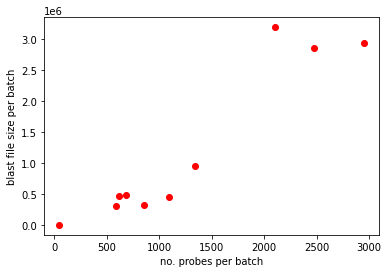

In [10]:
import matplotlib.pyplot as plt
plt.plot(no_probes_per_batch, blast_file_size_per_batch, 'ro')
plt.xlabel('no. probes in batch')
plt.ylabel('blast file size per batch (bytes)')
plt.show()

#Approx linear relationship between no. probes in batch and blast file size per batch.

In [4]:
#apply filter
filter_exact.apply()

#for n=10,5,2 batches:

#check no probes per batch 

#run blast

#make graph x- different batches (with approx no probes), y file size of each batch (should be approx a straight line)

#run experiment again for n
